# 1.0 Imports

###### 1.1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

import pickle

import time

tempo_agora = time.time() # Tempo inicial

###### 1.2 Loading series

In [2]:
X = pickle.load(open('D:\\my drive\\pessoal\\projetos\\bar_sales_forecast\\bar_sales_forecast\\exportings\\X_to_modeling.pkl', 'rb'))
y = pickle.load(open('D:\\my drive\\pessoal\\projetos\\bar_sales_forecast\\bar_sales_forecast\\exportings\\y_to_modeling.pkl', 'rb'))

# 2.0 Training ML Model

## 2.1 ARIMA

In [3]:
arima_model = ARIMA(endog=y, order=(7, 7, 7))

arima_fit = arima_model.fit()

print(arima_fit.summary())

D:\My Drive\Pessoal\Projetos\environments\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                  444
Model:                 ARIMA(7, 7, 7)   Log Likelihood               -3974.605
Date:                Mon, 08 Nov 2021   AIC                           7979.210
Time:                        12:36:30   BIC                           8040.409
Sample:                    01-02-2019   HQIC                          8003.360
                         - 03-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.6379      0.419     -8.679      0.000      -4.459      -2.816
ar.L2         -6.6312      1.155     -5.741      0.000      -8.895      -4.367
ar.L3         -7.9937      1.788     -4.472      0.0

D:\My Drive\Pessoal\Projetos\environments\data_science\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
arima_pred = arima_fit.predict(start='2019-12-12', end='2020-03-20')

In [5]:
y['predicts'] = arima_pred

<AxesSubplot:xlabel='date'>

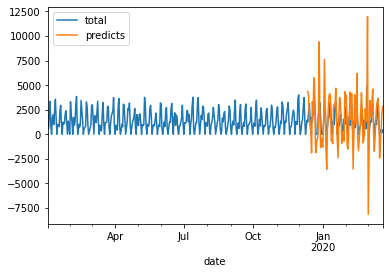

In [6]:
y[['total', 'predicts']].plot()

In [7]:
y['square_error'] = (y['total'] - y['predicts']) ** 2

In [8]:
y['absolut_error'] = np.sqrt(y['square_error'])

**MAE**

In [9]:
y['absolut_error'].mean()

1715.9292458306293

**MAPE**

In [10]:
y.loc[y['total'] == 0, 'total'] = 10 ** -6

# Time

In [11]:
print(f'O projeto está processando em {round((time.time() - tempo_agora) / 60, 2)} minutos')

O projeto está processando em 0.05 minutos
